In [1]:
import pandas_datareader as pdr 
import pandas as pd 
from datetime import datetime 

In [3]:
!pip install yfinance

### Here i am using 'yfinance' library is a Python library that provides a convenient interface for fetching historical market data, including stock prices, from Yahoo Finance. It allows users to easily download financial data for various assets, such as stocks, indices, and currencies, using simple and intuitive functions.

In [4]:
import yfinance as yf
data = yf.download('GOOGL', start='2020-09-01', end = '2023-10-31')


[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,81.608002,82.960999,81.476501,82.753998,82.753998,22652000
2020-09-02,83.400497,86.305000,83.009499,85.869499,85.869499,49522000
2020-09-03,84.975998,85.000000,80.385498,81.475502,81.475502,63726000
2020-09-04,80.449997,81.749496,76.898499,79.060501,79.060501,55850000
2020-09-08,76.250000,77.777496,75.824997,76.180000,76.180000,54032000


We have five variables here in our data and our main focus is on close price for the prediction 

In [6]:
# Here with this we Automatically have Date as our index 
data.index 

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-14', '2020-09-15',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

# EDA

In [7]:
import matplotlib.pyplot as plt 

<AxesSubplot:xlabel='Date'>

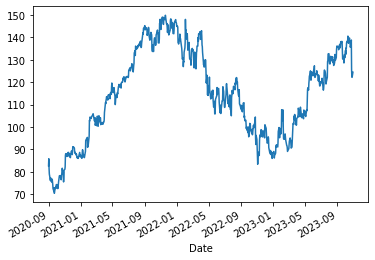

In [8]:
#Plotting close price
data['Close'].plot()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 796 entries, 2020-09-01 to 2023-10-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       796 non-null    float64
 1   High       796 non-null    float64
 2   Low        796 non-null    float64
 3   Close      796 non-null    float64
 4   Adj Close  796 non-null    float64
 5   Volume     796 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.5 KB


In [10]:
# statistical description of the data 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,796.000000,796.000000,796.000000,796.000000,796.000000,7.960000e+02
mean,114.453062,115.814183,113.167300,114.500838,114.500838,3.310135e+07
std,20.096337,20.111326,19.931278,20.028944,20.028944,1.365833e+07
min,70.134003,71.899498,70.107498,70.469498,70.469498,9.312000e+06
25%,98.545000,100.037500,97.177498,98.814997,98.814997,2.436872e+07
50%,115.151001,116.715000,113.705002,114.847752,114.847752,2.996500e+07
75%,132.328381,133.809502,130.231750,132.457245,132.457245,3.745500e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.232000e+08


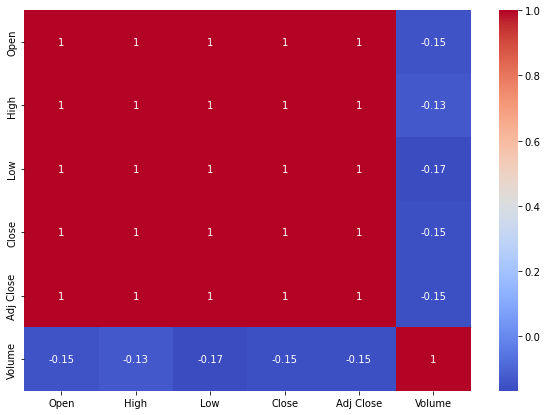

In [11]:
# correleation plot 
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),cmap='coolwarm', annot = True);

In [12]:
df2 = data[["Close"]].copy()

In [13]:
df2.head()

,Close
Date,
2020-09-01,82.753998
2020-09-02,85.869499
2020-09-03,81.475502
2020-09-04,79.060501
2020-09-08,76.180000


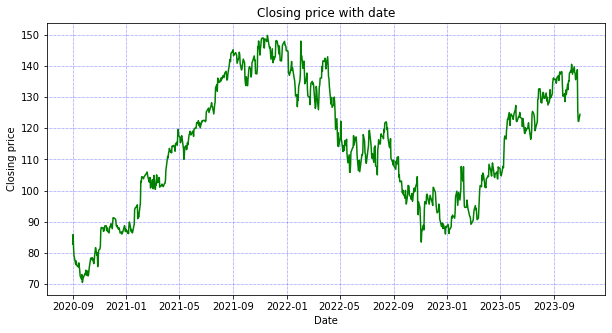

In [14]:
# plot dependent variable:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(data['Close'], color= 'g')
plt.title('Closing price with date')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.grid(linestyle=':', linewidth = '0.5', color = 'b') # to display and customize gridlines on a plot.
plt.show()

## Decomposition of time serirs data 

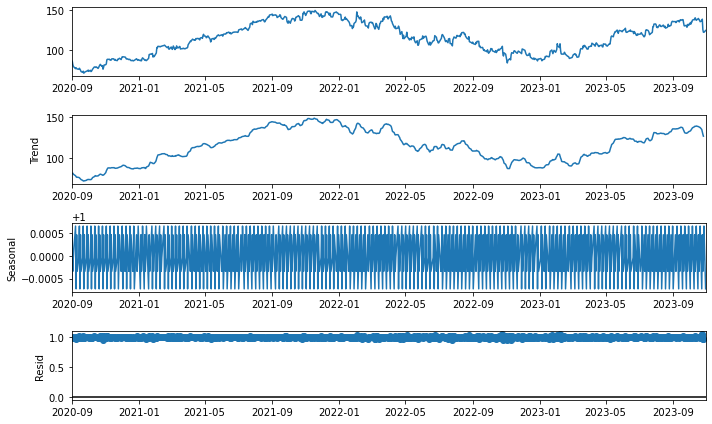

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
## decompostion the time series data.
plt.rcParams['figure.figsize']=(10,6)
df2_mul_decompose = seasonal_decompose(df2, model="multiplicative", period = 5)
df2_mul_decompose.plot()
plt.show()

### Stationarity:
Before we start modeling, we should understand  an important property of time series stationarity.
If a process is stationary, that it  means it does not change its statistical properties over time, namely

* Mean
* Variance (The constancy of vriance is called homoscedasticity)
* The covariance function does not depend on time. it should only depend on the distance between observations.

So why is stationarity so important? Because it is easy to make predictions on a stationary series since we can assume that the future statistical properties will not be different from those currently observed.

To check the given series is stationary or not, We will use dickey fuller test.

In [16]:
# Dickey fuller test:
# null Hypo: There is no stationarity.
# Augmented Dickey Fuller Test test.
from statsmodels.tsa.stattools import adfuller

In [17]:
result = adfuller(df2.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.9507463129764337
p-value: 0.30857756761186605


the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%
*  p-value > critical value (default: 0.05)
(Fail to reject (H0), the data is non-stationary.)
*  p-value <= critical value (default: 0.05) 
(Reject the (H0), the data is stationary.)

p-value: The probability of obtaining the ADF statistic if the null hypothesis is true. The lower the p-value, the stronger the evidence against the null hypothesis.
Critical Values(5%): The critical value for the ADF test at, 5% significance level are used to determine whether the null hypothesis should be rejected or not. 


Here in our case we failed to reject the null hypothesis it means that our data is not stationary 

## Autocorrelation Function (ACF)
Autocorrelation is the correlation between a time series with a lagged version of itself. The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. From the ACF, you can assess the randomness and stationarity of a time series. 
The autocorrelation function declines to near zero rapidly for a stationary time series.  the ACF drops slowly for a non-stationary time series. we determine the q value of ARIMA model from this plot


## Partial autocorrelation function(PACF)
The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain.  The autocorrelation function helps assess the properties of a time series.we determine the p value of ARIMA model from this plot


In [18]:
from statsmodels.graphics.tsaplots import plot_acf

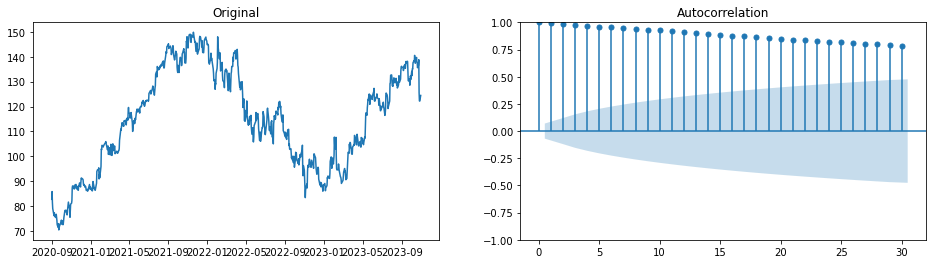

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df2.Close)
ax1.set_title("Original")

plot_acf(df2.Close, ax=ax2);

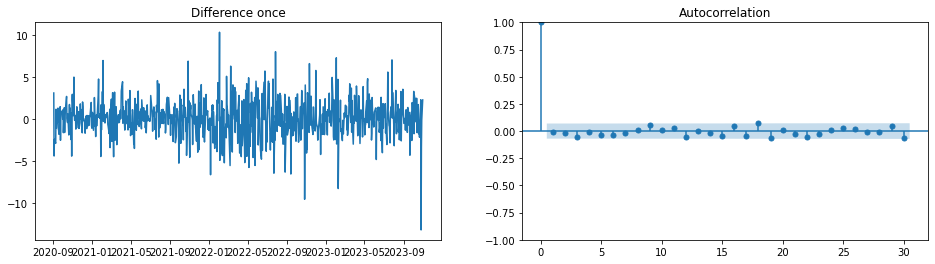

In [20]:
diff = df2.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [21]:
# p

from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\bhagy\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


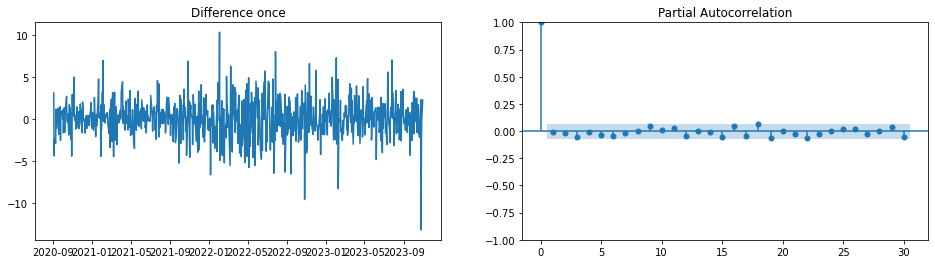

In [22]:
diff = df2.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

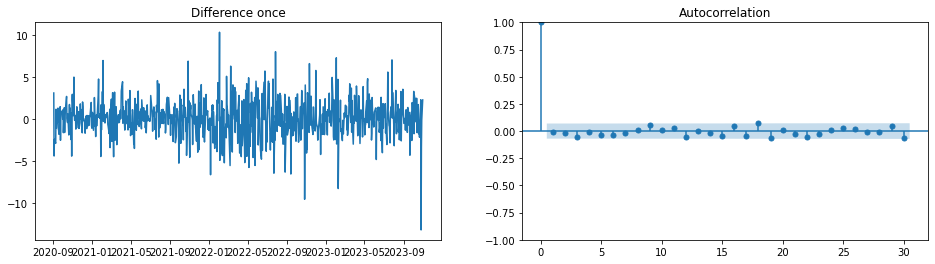

In [23]:
# q

diff = df2.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [24]:
data1 = list(df2["Close"])

In [26]:
# differencing value

from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data1,test = "adf")
print("d value:", d_value)

d value: 1


# ARIMA model

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [28]:
x_train= data1[:-100]
x_test = data1[-100:]
print(len(x_train),len(x_test))

696 100


In [29]:
stepwise_fit = auto_arima(data1,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3562.513, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3557.885, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3559.755, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3559.749, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3556.313, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3558.514, Time=0.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.050 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  796
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1777.156
Date:                Wed, 22 Nov 2023   AIC                           3556.313
Time:                        23:34:03   BIC                           3560.991
Sample:                             0   HQIC                          3558.111
          

In [30]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data1, order=(18,1,18))

In [31]:
model = model.fit()
model.summary()

C:\Users\bhagy\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bhagy\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  796
Model:               ARIMA(18, 1, 18)   Log Likelihood               -1754.353
Date:                Wed, 22 Nov 2023   AIC                           3582.706
Time:                        23:34:51   BIC                           3755.804
Sample:                             0   HQIC                          3649.222
                                - 796                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5749      0.672     -0.856      0.392      -1.892       0.742
ar.L2          0.0257      0.437      0.059      0.953      -0.830       0.882
ar.L3          0.2611      0.235      1.112      0.266      -0.199       0.721
ar.L4         -0.1221      0.323     -0.378      0.705      -0.754       0.510
ar.L5         -0.5090      0.202     -2.526      0.012      -0.904      -0.114
ar.L6         -0.4634      0.370     -1.251      0.211      -1.189       0.263
ar.L7          0.1942      0.408      0.476      0.634      -0.605       0.993
ar.L8          0.2119      0.254      0.835      0.404      -0.286       0.709
ar.L9         -0.2366      0.243     -0.974      0.330      -0.713       0.240
ar.L10        -0.0252      0.271     -0.093      0.926      -0.556       0.506
ar.L11         0.6702      0.153      4.378      0.000       0.370       0.970
ar.L12         0.4216      0.482      0.874      0.382      -0.523       1.367
ar.L13         0.0330      0.301      0.110      0.913      -0.557       0.623
ar.L14        -0.3133      0.197     -1.587      0.113      -0.700       0.074
ar.L15         0.1517      0.333      0.455      0.649      -0.501       0.804
ar.L16         0.5129      0.176      2.913      0.004       0.168       0.858
ar.L17         0.5834      0.425      1.373      0.170      -0.249       1.416
ar.L18         0.1394      0.421      0.331      0.741      -0.686       0.965
ma.L1          0.5781      0.683      0.846      0.397      -0.760       1.917
ma.L2         -0.0542      0.464     -0.117      0.907      -0.963       0.855
ma.L3         -0.3336      0.245     -1.360      0.174      -0.814       0.147
ma.L4          0.0847      0.356      0.238      0.812      -0.613       0.782
ma.L5          0.4905      0.215      2.280      0.023       0.069       0.912
ma.L6          0.4607      0.382      1.205      0.228      -0.288       1.210
ma.L7         -0.2116      0.441     -0.480      0.631      -1.076       0.653
ma.L8         -0.2331      0.248     -0.938      0.348      -0.720       0.254
ma.L9          0.2532      0.258      0.981      0.327      -0.253       0.759
ma.L10         0.0303      0.303      0.100      0.920      -0.564       0.625
ma.L11        -0.7035      0.192     -3.666      0.000      -1.080      -0.327
ma.L12        -0.4704      0.491     -0.958      0.338      -1.433       0.492
ma.L13         0.0123      0.334      0.037      0.971      -0.642       0.667
ma.L14         0.4271      0.204      2.093      0.036       0.027       0.827
ma.L15        -0.1275      0.408     -0.313      0.755      -0.926       0.671
ma.L16        -0.4998      0.194     -2.576      0.010      -0.880      -0.120
ma.L17        -0.6323      0.415     -1.525      0.127      -1.445       0.180
ma.L18        -0.0670      0.475     -0.141      0.888      -0.998       0.864
sigma2         4.9022      0.298     16.472      0.000       4.319       5.485
=================================================================================

In [32]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([121.40117627, 121.68541268, 122.87782956, 122.81097444,
       124.66391456, 123.92275844, 125.87425197, 122.95627405,
       123.01696344, 120.73274868, 122.24455265, 122.20188613,
       118.68632966, 118.99917095, 120.32333509, 119.24302361,
       120.04415291, 119.22018834, 121.09473686, 120.20282789,
       118.77018604, 116.71165218, 117.22801906, 120.45406184,
       124.27532901, 125.27692254, 124.36679934, 123.08989897,
       121.18886064, 118.72264093, 120.92753347, 121.96124226,
       122.20397876, 129.96363959, 129.24746683, 131.59776783,
       132.14176105, 131.05557762, 128.20371391, 128.13084341,
       128.85844836, 132.59511361, 131.21218165, 129.47928669,
       129.39259129, 129.17140503, 130.4985737 , 129.77289908,
       129.64277262, 129.88079195, 128.13323645, 128.15923215,
       129.68637648, 131.57753484, 129.07731626, 129.15493349,
       130.92846711, 134.16409214, 136.67554094, 136.82021465,
       135.77731511, 135.88372335, 133.49432037, 135.30

In [33]:
pred.shape

(100,)

In [34]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2023-06-08    121.401176
2023-06-09    121.685413
2023-06-12    122.877830
2023-06-13    122.810974
2023-06-14    124.663915
                 ...    
2023-10-24    137.127849
2023-10-25    137.886057
2023-10-26    126.623921
2023-10-27    122.433446
2023-10-30    122.858725
Length: 100, dtype: float64

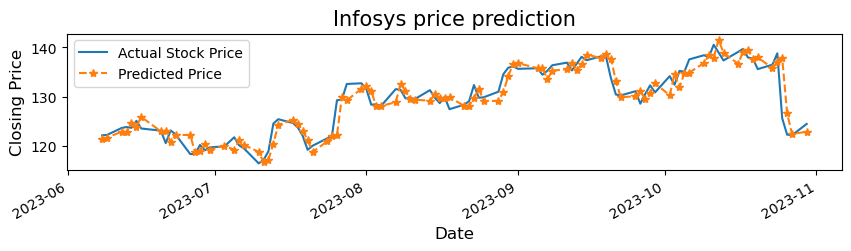

In [35]:
plt.figure(figsize=(10,2), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', marker ='*', linestyle= 'dashed', legend=True,)
plt.title('Infosys price prediction', size = 15)
plt.xlabel('Date', size = 12)
plt.ylabel('Closing Price', size = 12)
plt.legend()
plt.show();

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

2.2604314616928143

In [37]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.8812701621971932

Here in this analysis i have got 88% accuracy with my ARIMA model(18,1,18) where the p and q values are determined from the ACF and PACf plots. i have tried multiple combinations of p and q values and this combination was giving best performance 

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def mape(x_test, pred): 
    actual, pred = np.array(x_test), np.array(pred)
    return np.mean(np.abs((x_test - pred) / actual)) * 100
mape_value = mape(x_test, pred)
print(mape_value)

1.2390692685234241


### Here i noticed one thing that whenever i try to increase the number of test data modal is giving high accuracy

### Now implementing the LSTM model 

In the predictive analytics project lies a sophisticated neural network architecture known as Long Short-Term Memory (LSTM). LSTMs are a specialized type of recurrent neural network (RNN) designed to overcome challenges in capturing and retaining long-range dependencies within sequential data.


* Memory Cells:
LSTMs are equipped with memory cells, allowing them to retain information over extended periods. This capability is crucial for understanding and leveraging historical patterns in time-series data.

* Sequential Data Mastery:
Unlike conventional neural networks, LSTMs excel at comprehending sequential data, making them invaluable for tasks where the sequence of events is paramount, such as predicting stock prices based on historical trends.

* Mitigating Challenges:
LSTMs are tailored to address challenges like the vanishing gradient problem, a common hurdle in training deep neural networks. This feature enhances their ability to capture intricate temporal dependencies.

In [39]:
## importing  all the neccessary libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [40]:
# Extract the 'Close' prices
data = df2['Close'].values.reshape(-1, 1)


In [41]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [42]:
# Create sequences for training
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
time_step = 60 
X, y = create_dataset(scaled_data, time_step)


In [44]:
# Reshape the data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

In [45]:
# Split the data into training and testing sets
training_size = int(len(X) * 0.75)
X_train, X_test = X[0:training_size], X[training_size:len(X)]
y_train, y_test = y[0:training_size], y[training_size:len(y)]

In [46]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 [==============================] - 9s 171ms/step - loss: 0.1058 - val_loss: 0.0132
Epoch 2/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0111 - val_loss: 0.0058
Epoch 3/50
18/18 [==============================] - 1s 78ms/step - loss: 0.0054 - val_loss: 0.0040
Epoch 4/50
18/18 [==============================] - 1s 75ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 5/50
18/18 [==============================] - 1s 77ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/50
18/18 [==============================] - 1s 78ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
18/18 [==============================] - 1s 77ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/50
18/18 [==============================] - 1s 75ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/50
18/18 [==============================] - 1s 73ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 10/50
18/18 [==============================] - 1s 79ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 11

In [48]:
# Make predictions on the test data
y_pred = model.predict(X_test)


6/6 [==============================] - 1s 25ms/step


In [49]:
# Inverse transform the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

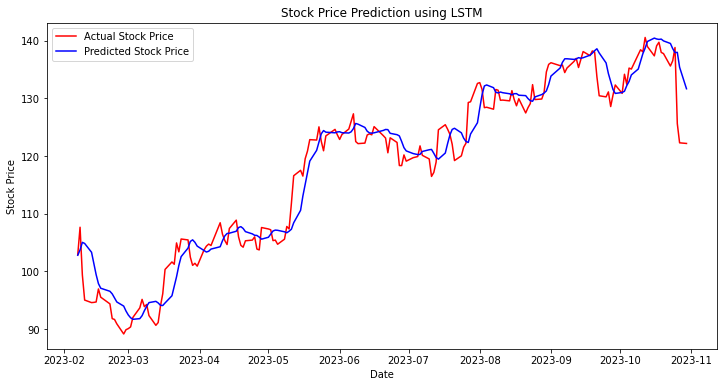

In [51]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df2.index[-len(y_test):], y_test_inv, label='Actual Stock Price', color='red')
plt.plot(df2.index[-len(y_test):], y_pred_inv, label='Predicted Stock Price', color='blue')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [56]:
import math
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.3696533645462767


In [57]:
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.9478037230518525


Here i get approximatelty 95% accuracy with LSTM model 

### If i campare my both the model lstm is giving best accuracy 